# Projeto: Modelagem Preditiva de Propensão à Contratação de Empréstimos
**Autora:** Andressa de Souza  
**Curso:** MBA em Data Science e Analytics  
**Instituição:** USP/ESALQ  
**Ano:** 2026


# 1. Introdução/Objetivo

Este notebook tem como objetivo construir e comparar modelos preditivos de machine learning para estimar a propensão dos clientes à contratação de empréstimos utilizando uma base de dados do Kaggle.

Serão realizadas as etapas de limpeza, análise exploratória e processamento dos dados, seguidas pela implementação, treino e comparação de diferentes algoritmos de modelos preditivos.

Por fim, serão avaliadas as métricas de performance para identificação da abordagem mais eficaz e a importância das variáveis, visando gerar insights relevantes para decisões de negócio.

# 2. Importação de Bibliotecas

In [1]:
# Instalação de bibliotecas necessárias
! pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Modelos avançados
import xgboost as xgb
import lightgbm as lgb

# Criar pasta para salvar gráficos
output_dir = 'graficos'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 3. Análise Exploratória

In [3]:
# Carregar o dataset
df = pd.read_csv('../data/Bank_Personal_Loan_pred.csv')

print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

O dataset possui 5000 linhas e 14 colunas.


,ID,Age,Experience,Income,ZIP Code_ID,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Mostrar informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code_ID         5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Checagem das colunas do DataFrame
df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code_ID',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

## 3.1 Descrição das Variáveis

| Nome da variável | Descrição |
|-----------------|-----------|
| `ID` | Identificador único do cliente |
| `Age` | Idade do cliente |
| `Experience` | Tempo de experiência profissional |
| `Income` | Renda do cliente |
| `ZIP_Code_ID` | Identificador da região |
| `Family` | Número de pessoas na família |
| `CCAvg` | Gasto médio no cartão de crédito |
| `Education` | Nível de escolaridade do cliente |
| `Mortgage` | Valor do financiamento imobiliário |
| `Personal_Loan` | Indica se o cliente contratou empréstimo pessoal (variável alvo) |
| `Securities_Account` | Indica se o cliente possui conta de investimentos |
| `CD_Account` | Indica se o cliente possui certificado de depósito |
| `Online` | Indica se o cliente utiliza canais digitais |
| `CreditCard` | Indica se o cliente possui cartão de crédito |


In [6]:
# Função para limpar e padronizar os nomes das colunas
def clean_column_names(df):
    df = df.copy()
    new_columns = []
    for col in df.columns:
        col_clean = col.strip()                     # remove espaços no começo/fim
        col_clean = col_clean.replace(" ", "_")     # substitui espaços por "_"
        col_clean = re.sub(r'\W+', '_', col_clean)  # substitui caracteres especiais por "_"
        col_clean = col_clean.lower()               # transforma em letras minúsculas
        new_columns.append(col_clean)
    df.columns = new_columns
    return df

df = clean_column_names(df)
df.head()

,id,age,experience,income,zip_code_id,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# Identificação de variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
cat_vars = df.select_dtypes(include="object").columns

print("\nVariáveis numéricas:")
print(num_vars)

print("\nVariáveis categóricas:")
print(cat_vars)


Variáveis numéricas:
Index(['id', 'age', 'experience', 'income', 'zip_code_id', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

Variáveis categóricas:
Index([], dtype='object')


In [8]:
# Definição da variável target
target = "personal_loan"

# Remoção das colunas 'id' e 'zip_code_id' que não serão utilizadas para a análise
df = df.drop(columns=["id", "zip_code_id"])

In [9]:
# Definição das variáveis numéricas e categóricas manualmente
num_vars = [
    "age",
    "experience",
    "income",
    "ccavg",
    "mortgage",
    "family"
]

cat_vars = [
    "education",
    "securities_account",
    "cd_account",
    "online",
    "creditcard"
]

## 3.2 Distribuição das Variáveis

In [10]:
# Análise de valores nulos
missing_num = df[num_vars].isnull().mean()
missing_cat = df[cat_vars].isnull().mean()

print("Valores nulos - variáveis numéricas:")
print(missing_num)

print("\nValores nulos - variáveis categóricas:")
print(missing_cat)


Valores nulos - variáveis numéricas:
age           0.0
experience    0.0
income        0.0
ccavg         0.0
mortgage      0.0
family        0.0
dtype: float64

Valores nulos - variáveis categóricas:
education             0.0
securities_account    0.0
cd_account            0.0
online                0.0
creditcard            0.0
dtype: float64


In [11]:
# Estatísticas descritivas das variáveis numéricas
desc = df[num_vars].describe().T

# Cálculo de skewness - distribuição assimétrica das variáveis numéricas
desc["skew"] = df[num_vars].skew()

desc

,count,mean,std,min,25%,50%,75%,max,skew
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0,-0.029341
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0,-0.026325
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0,0.841339
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0,1.598443
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0,2.104002
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0,0.155221


In [12]:
# Checagem de valores negativos na variável 'experience'
(df['experience'] < 0).value_counts()

experience
False    4948
True       52
Name: count, dtype: int64

In [13]:
# Correção de valores negativos na variável 'experience', assumindo que valores negativos serão tratados como zero
df['experience'] = np.where (df['experience'] < 0, 0, df['experience'])

In [14]:
# Checagem da distribuição da variável target
df[target].value_counts(normalize=True)

personal_loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [15]:
# Análise da distribuição das variáveis categóricas
for col in cat_vars:
    print(f"\n Distribuição de {col}")
    print(df[col].value_counts(normalize=True))



 Distribuição de education
education
1    0.4192
3    0.3002
2    0.2806
Name: proportion, dtype: float64

 Distribuição de securities_account
securities_account
0    0.8956
1    0.1044
Name: proportion, dtype: float64

 Distribuição de cd_account
cd_account
0    0.9396
1    0.0604
Name: proportion, dtype: float64

 Distribuição de online
online
1    0.5968
0    0.4032
Name: proportion, dtype: float64

 Distribuição de creditcard
creditcard
0    0.706
1    0.294
Name: proportion, dtype: float64


In [16]:
# Cálculo da média das variáveis numéricas por target
for col in num_vars:
    print(f"\nMédia de {col} por target")
    print(df.groupby(target)[col].mean())


Média de age por target
personal_loan
0    45.367257
1    45.066667
Name: age, dtype: float64

Média de experience por target
personal_loan
0    20.148894
1    19.843750
Name: experience, dtype: float64

Média de income por target
personal_loan
0     66.237389
1    144.745833
Name: income, dtype: float64

Média de ccavg por target
personal_loan
0    1.729009
1    3.905354
Name: ccavg, dtype: float64

Média de mortgage por target
personal_loan
0     51.789381
1    100.845833
Name: mortgage, dtype: float64

Média de family por target
personal_loan
0    2.373451
1    2.612500
Name: family, dtype: float64


## 3.3 Gráficos

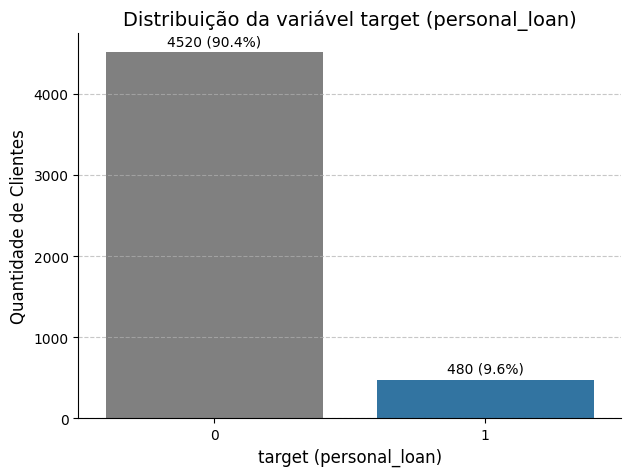

In [17]:
# Análise da distribuição da variável target
target_counts = df['personal_loan'].value_counts().sort_index()
target_percent = target_counts / target_counts.sum() * 100

plt.figure(figsize=(7,5))

sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    hue=target_counts.index,  
    dodge=False,              
    palette=['#808080', '#1f77b4'],
    legend=False             
)

plt.title("Distribuição da variável target (personal_loan)", fontsize=14)
plt.xlabel("target (personal_loan)", fontsize=12)
plt.ylabel("Quantidade de Clientes", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(target_counts.values): # adiciona quantidade e percentual acima de cada barra
    pct = target_percent[i]
    plt.text(i, count + max(target_counts.values)*0.01,  
             f"{count} ({pct:.1f}%)",
             ha='center', va='bottom', fontsize=10)

plt.savefig(os.path.join(output_dir, 'distribuicao_target_percentual.png'), bbox_inches='tight') # salva gráfico na pasta

plt.show()

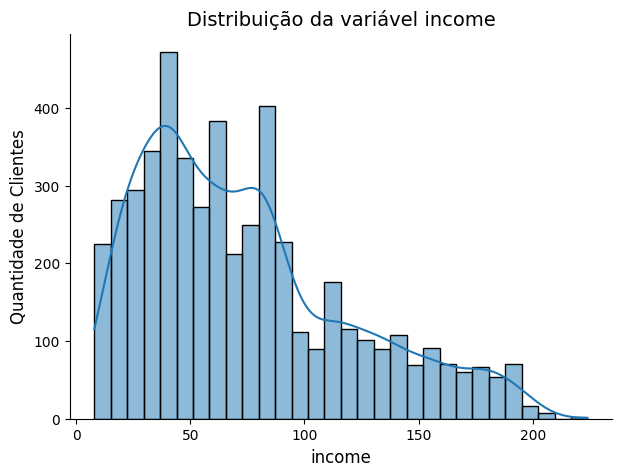

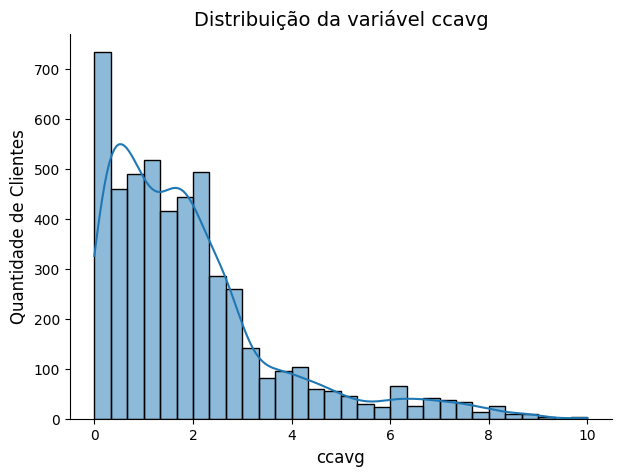

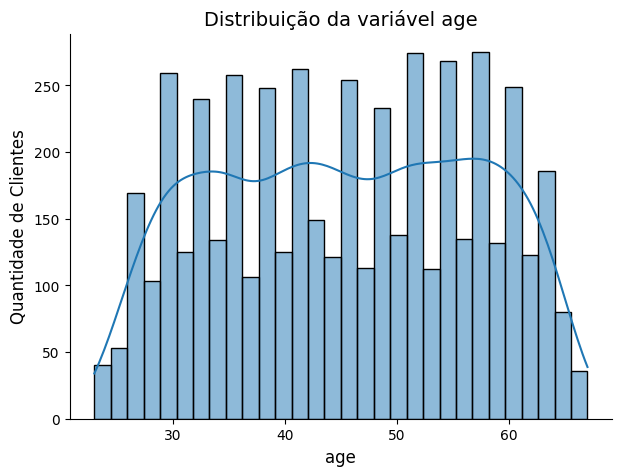

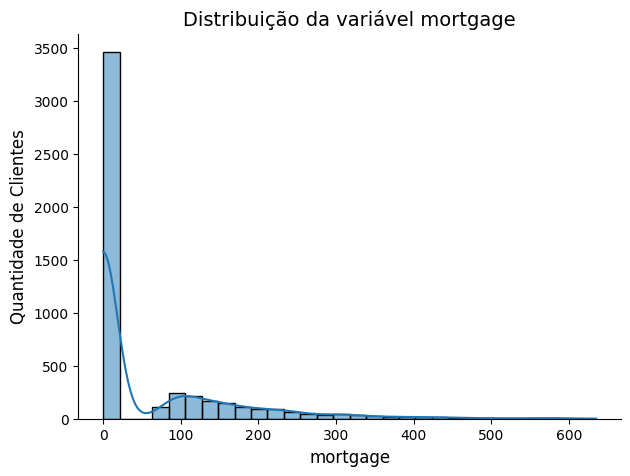

In [18]:
# Análise da distribuição das variáveis numéricas
for col in ["income", "ccavg", "age", "mortgage"]:
    plt.figure(figsize=(7,5))
    
    sns.histplot(df[col], bins=30, kde=True, color="#1f77b4")
    
    plt.title(f"Distribuição da variável {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Quantidade de Clientes", fontsize=12)

    sns.despine()
    plt.grid(False)
    
    plt.savefig(os.path.join(output_dir, f'distribuicao_{col}.png'), bbox_inches='tight') # salva gráfico na pasta
    
    plt.show()


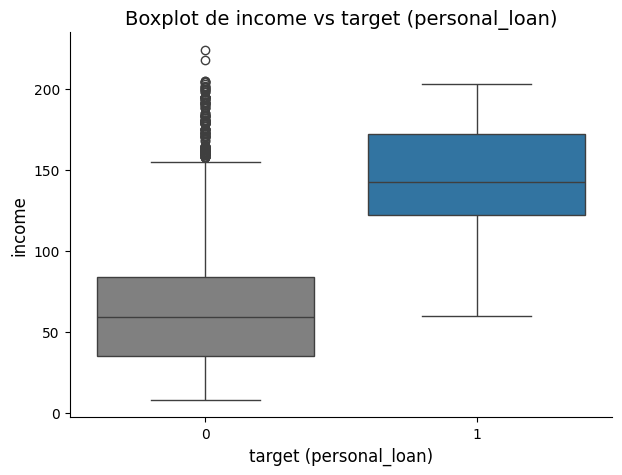

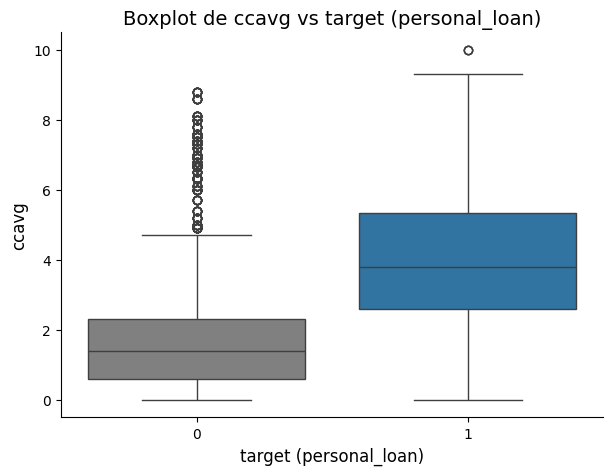

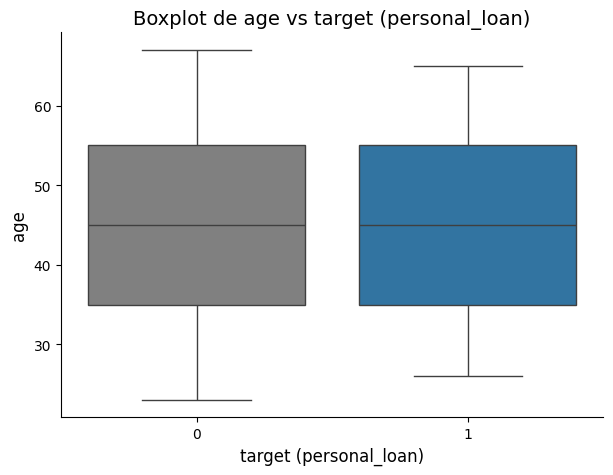

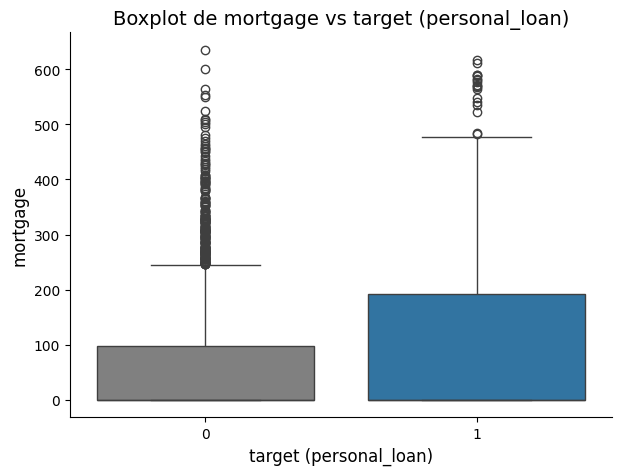

In [19]:
# Boxplots das variáveis numéricas por target
for col in  ["income", "ccavg", "age", "mortgage"]:
    plt.figure(figsize=(7,5))
    
    palette = {0: '#808080', 1: '#1f77b4'}
    
    sns.boxplot(x='personal_loan', y=col, data=df, hue='personal_loan', palette={0: '#808080', 1: '#1f77b4'}, dodge=False, legend=False)
    
    plt.title(f"Boxplot de {col} vs target (personal_loan)", fontsize=14)
    plt.xlabel("target (personal_loan)", fontsize=12)
    plt.ylabel(col, fontsize=12)

    sns.despine()
    plt.grid(False)
    
    plt.savefig(os.path.join(output_dir, f'boxplot_{col}.png'), bbox_inches='tight') # salva gráfico na pasta
    
    plt.show()

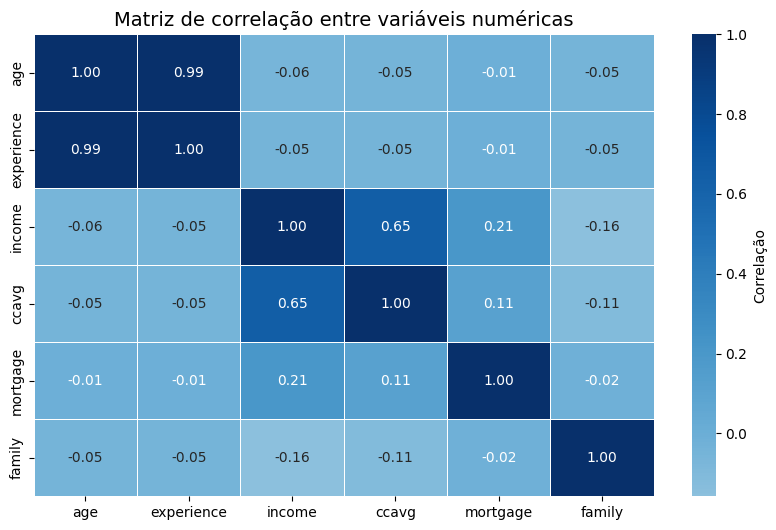

In [20]:
# Matriz de correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(
    df[num_vars].corr(),     
    cmap="Blues",              
    center=0,
    annot=True,              
    fmt=".2f",                
    cbar_kws={'label': 'Correlação'},  
    linewidths=0.5,           
    linecolor='white'        
)

plt.title("Matriz de correlação entre variáveis numéricas", fontsize=14)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.savefig(os.path.join(output_dir, 'matriz_correlacao.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

In [21]:
# Identificação de outliers usando o método do interquartil (IQR)
outliers = {}

for col in num_vars:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    out = df[(df[col] < lower) | (df[col] > upper)]
    
    outliers[col] = out.shape[0]

pd.Series(outliers).sort_values(ascending=False)


ccavg         324
mortgage      291
income         96
age             0
experience      0
family          0
dtype: int64

# 4. Modelagem

## 4.1 Regressão Logística

In [22]:
# Divisão do dataset em treino e teste
target = "personal_loan"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)

In [23]:
# Configuração do pipeline para o modelo de Regressão Logística
logit_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        solver="lbfgs"
    ))
])

In [24]:
# Treinamento do modelo de Regressão Logística
logit_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [25]:
# Avaliação do modelo de Regressão Logística
y_proba = logit_pipeline.predict_proba(X_test)[:, 1]
y_pred = logit_pipeline.predict(X_test)

# Métricas do modelo de Regressão Logística
auc = roc_auc_score(y_test, y_proba)

print(f"AUC ROC (Logistic Regression): {auc:.4f}")
print(classification_report(y_test, y_pred))

AUC ROC (Logistic Regression): 0.9510
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [26]:
# Coeficientes do modelo de Regressão Logística
coef = logit_pipeline.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({
    "variavel": X.columns,
    "coeficiente": coef, # coeficientes do modelo de Regressão Logística
    "odds_ratio": np.exp(coef) # cálculo do odds ratio para identificar a influência das variáveis
}).sort_values("odds_ratio", ascending=False)

coef_df

,variavel,coeficiente,odds_ratio
2,income,2.479648,11.937065
5,education,1.476738,4.378639
8,cd_account,0.980468,2.665702
3,family,0.761296,2.141050
1,experience,0.415808,1.515595
4,ccavg,0.210112,1.233817
6,mortgage,0.098016,1.102980
7,securities_account,-0.249064,0.779530
0,age,-0.280346,0.755523
9,online,-0.285228,0.751843


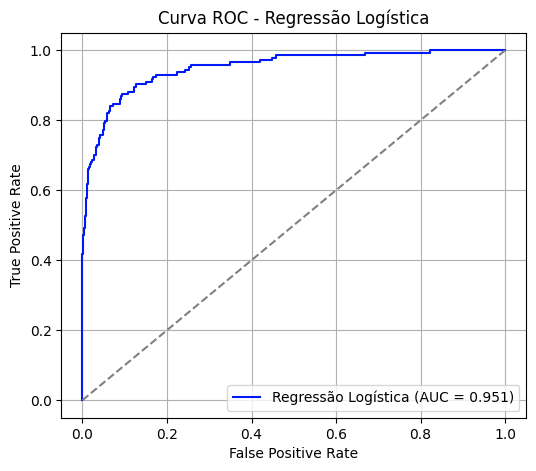

In [27]:
# Curva ROC do modelo de Regressão Logística
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Regressão Logística (AUC = {auc_score:.3f})', color="#001AF5")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'curva_roc_regressao_logistica.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

## 4.2 Random Forest

In [28]:
# Treinamento do modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=123)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [29]:
# Avaliação do modelo de Random Forest
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Métricas do modelo de Random Forest
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame(report).transpose()
metrics_df['AUC'] = auc_score
display(metrics_df)

,precision,recall,f1-score,support,AUC
0,0.989027,0.997050,0.993022,1356.000000,0.996518
1,0.969925,0.895833,0.931408,144.000000,0.996518
accuracy,0.987333,0.987333,0.987333,0.987333,0.996518
macro avg,0.979476,0.946442,0.962215,1500.000000,0.996518
weighted avg,0.987193,0.987333,0.987107,1500.000000,0.996518


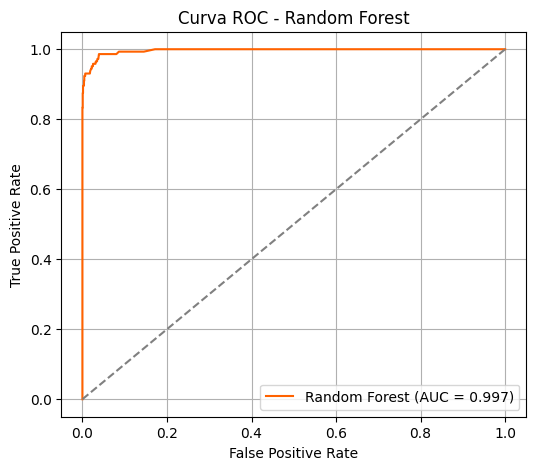

In [30]:
# Curva ROC do modelo de Random Forest
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.3f})', color="#FF6200")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'curva_roc_random_forest.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

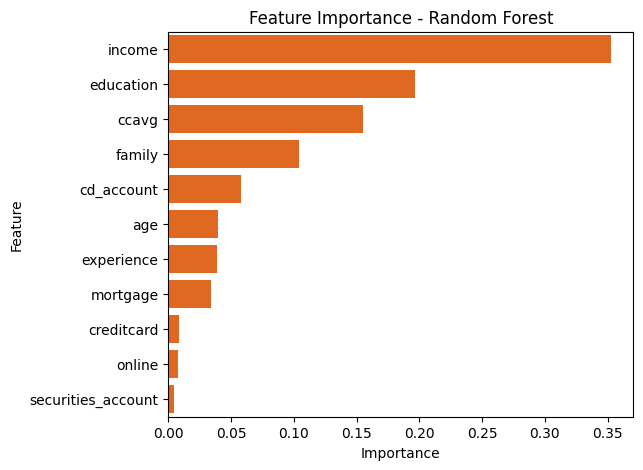

In [31]:
# Feature importance no modelo de Random Forest
fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=fi.values, y=fi.index, color="#FF6200")
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_dir, 'feature_importance_random_forest.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

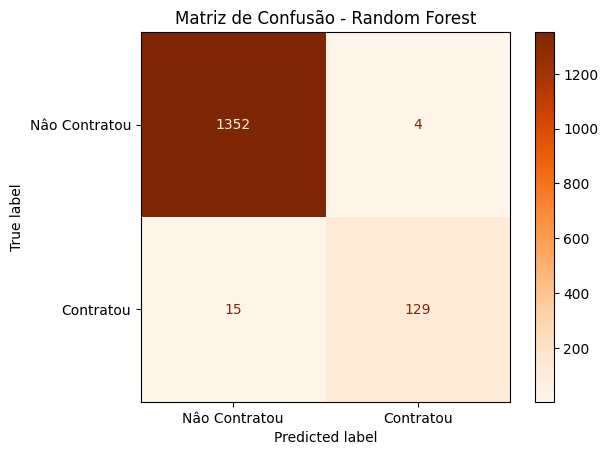

In [32]:
# Matriz de Confusão do modelo de Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['Nâo Contratou','Contratou'], cmap=plt.cm.Oranges)
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.savefig(os.path.join(output_dir, 'matriz_confusao_random_forest.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

## 4.3 XGBoost

In [33]:
# Treinamento do modelo XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=123)
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [34]:
# Avaliação do modelo XGBoost
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:,1]

# Métricas do modelo XGBoost
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame(report).transpose()
metrics_df['AUC'] = auc_score
display(metrics_df)

,precision,recall,f1-score,support,AUC
0,0.990441,0.993363,0.991900,1356.000000,0.997224
1,0.935714,0.909722,0.922535,144.000000,0.997224
accuracy,0.985333,0.985333,0.985333,0.985333,0.997224
macro avg,0.963078,0.951543,0.957218,1500.000000,0.997224
weighted avg,0.985187,0.985333,0.985241,1500.000000,0.997224


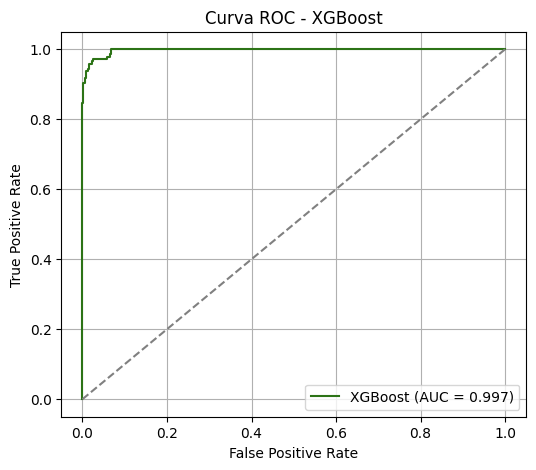

In [35]:
# Curva ROC do modelo XGBoost
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.3f})', color="#2C7316")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'curva_roc_xgboost.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

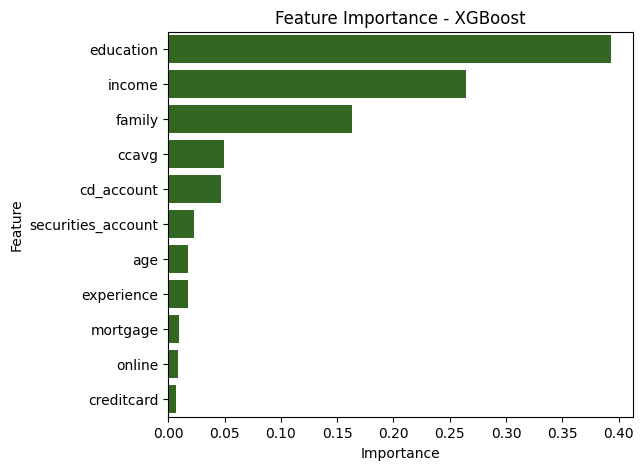

In [36]:
# Feature importance no modelo de XGBoost
fi = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=fi.values, y=fi.index, color="#2C7316")
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_dir, 'feature_importance_xgboost.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

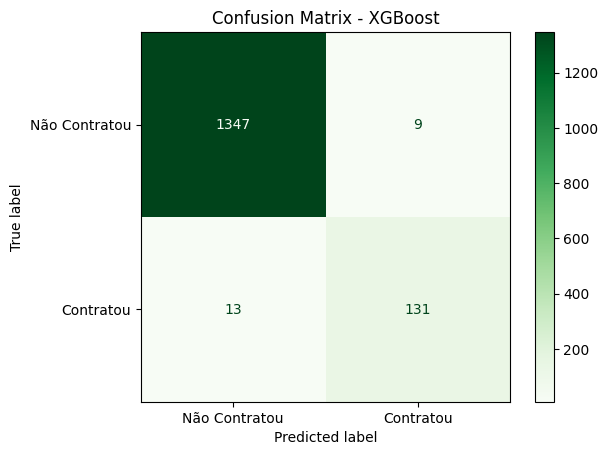

In [37]:
# Matriz de Confusão do modelo de XGBoost
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=['Não Contratou','Contratou'], cmap=plt.cm.Greens)
plt.title('Confusion Matrix - XGBoost')
plt.savefig(os.path.join(output_dir, 'matriz_confusao_xgboost.png'), bbox_inches='tight') # salva gráfico na pasta
plt.grid(False)
plt.show()

## 4.4 LightGBM

In [38]:
# Treinamento do modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=123)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 336, number of negative: 3164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [39]:
# Avaliação do modelo LightGBM
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)[:,1]

# Métricas do modelo LightGBM
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df['AUC'] = auc_score
display(metrics_df)

,precision,recall,f1-score,support,AUC
0,0.990462,0.995575,0.993012,1356.000000,0.997624
1,0.956204,0.909722,0.932384,144.000000,0.997624
accuracy,0.987333,0.987333,0.987333,0.987333,0.997624
macro avg,0.973333,0.952649,0.962698,1500.000000,0.997624
weighted avg,0.987173,0.987333,0.987192,1500.000000,0.997624


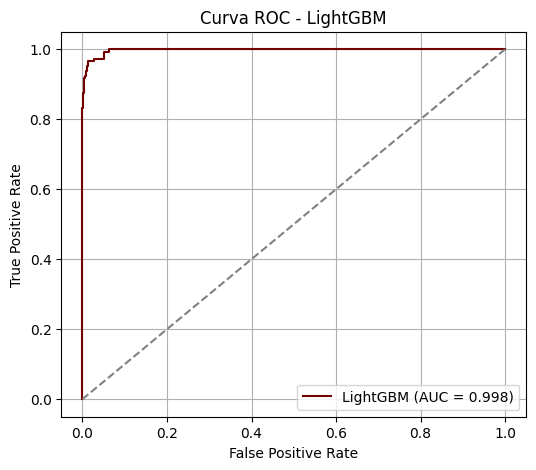

In [40]:
# Curva ROC do modelo LightGBM
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score:.3f})', color="#730000")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LightGBM')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'curva_roc_lightgbm.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

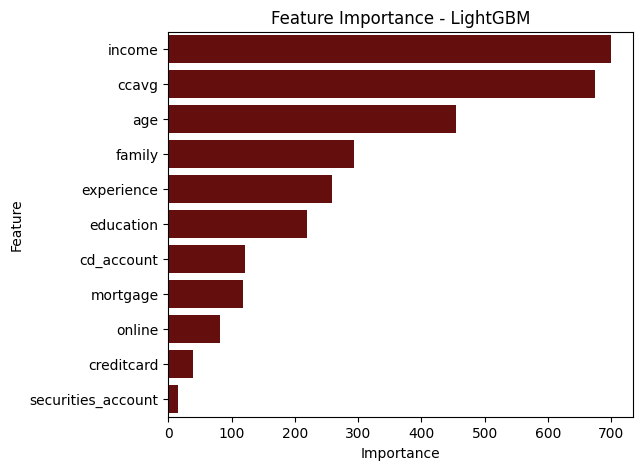

In [41]:
# Feature importance no modelo de LightGBM
fi = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=fi.values, y=fi.index, color="#730000")
plt.title('Feature Importance - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_dir, 'feature_importance_lightgbm.png'), bbox_inches='tight') # salva gráfico na pasta
plt.show()

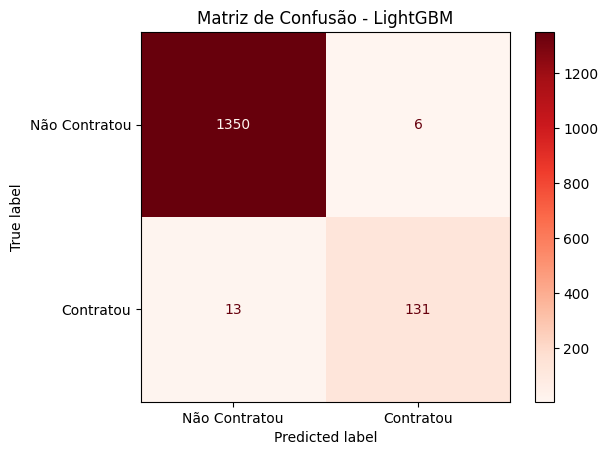

In [42]:
# Matriz de Confusão do modelo LightGBM
ConfusionMatrixDisplay.from_estimator(lgb_model, X_test, y_test, display_labels=['Não Contratou','Contratou'], cmap=plt.cm.Reds)
plt.title('Matriz de Confusão - LightGBM')
plt.savefig(os.path.join(output_dir, 'matriz_confusao_lightgbm.png'), bbox_inches='tight') # salva gráfico na pasta
plt.grid(False)
plt.show()

## 4.5 Comparativo entre Modelos

In [43]:
# Dicionário de modelos
models_all = {
    'Regressão Logística': logit_pipeline,
    'Random Forest': rf,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

# Dicionário com cores específicas
roc_colors = {
    'Regressão Logística': "#001AF5",
    'Random Forest': "#FF6200",
    'XGBoost': "#2C7316",
    'LightGBM': "#730000"
}

In [44]:
from sklearn.metrics import roc_curve, auc, classification_report

metrics_list = []

for name, model in models_all.items(): 
    
    y_pred = model.predict(X_test) 
    y_proba = model.predict_proba(X_test)[:,1] 

    auc_score = auc(*roc_curve(y_test, y_proba)[:2]) 
    report = classification_report(y_test, y_pred, output_dict=True) 
    
    metrics_list.append({
         'Model': name, 
         'AUC': auc_score, 
         'Precision_class1': report['1']['precision'], 
         'Recall_class1': report['1']['recall'], 
         'F1_class1': report['1']['f1-score'] 
         }) 
    
metrics_df = pd.DataFrame(metrics_list).sort_values(by='AUC', ascending=False) 
print("--------- Comparativo de Métricas Entre Modelos --------- ")
display(metrics_df)

--------- Comparativo de Métricas Entre Modelos --------- 


,Model,AUC,Precision_class1,Recall_class1,F1_class1
3,LightGBM,0.997624,0.956204,0.909722,0.932384
2,XGBoost,0.997224,0.935714,0.909722,0.922535
1,Random Forest,0.996518,0.969925,0.895833,0.931408
0,Regressão Logística,0.950969,0.830357,0.645833,0.726562


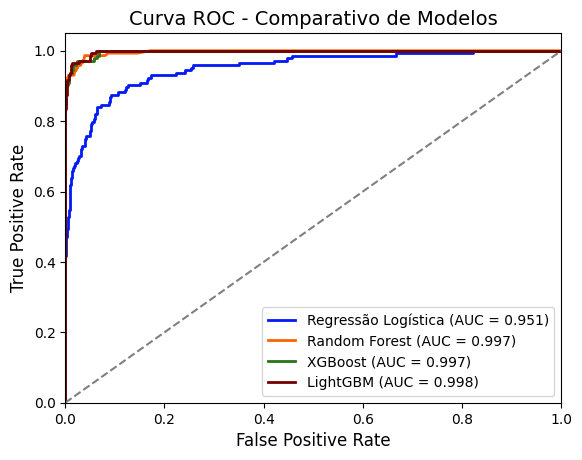

In [45]:
# Comparativo de métricas entre os modelos
from sklearn.metrics import roc_curve, auc, classification_report

for name, model in models_all.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    color = roc_colors.get(name, 'black')  # usar as cores do dicionário, com fallback para preto
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1],[0,1], linestyle='--', color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curva ROC - Comparativo de Modelos', fontsize=14)

plt.legend(loc='lower right')

# Salvar gráfico
output_dir = 'graficos'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'curva_roc_comparativo_modelos.png'), bbox_inches='tight')


In [46]:
# Dicionário de modelos com feature importance
models_feat = {
    'Random Forest': rf,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

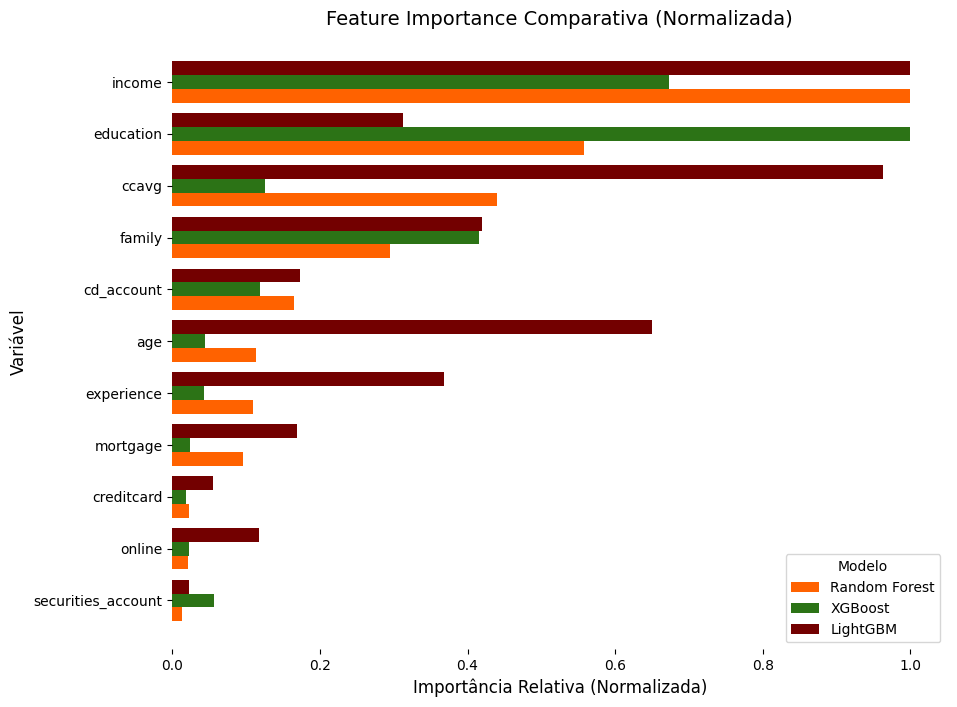

In [47]:
# DataFrame de Feature Importances
feat_importances = pd.DataFrame(index=X_train.columns)
for name, model in models_feat.items():
    feat_importances[name] = model.feature_importances_

# Normalizar (0–1)
feat_importances = feat_importances / feat_importances.max()

# Ordenar pelas importâncias do Random Forest
feat_importances = feat_importances.sort_values(by='Random Forest', ascending=True)


models = feat_importances.columns
n_models = len(models)
y = np.arange(len(feat_importances.index))
bar_height = 0.8 / n_models

plt.figure(figsize=(10,8))

# Plotar barras lado a lado
for i, model_name in enumerate(models):
    plt.barh(
        y + i * bar_height,
        feat_importances[model_name],
        height=bar_height,
        color=roc_colors.get(model_name, "#333333"),
        label=model_name
    )

plt.yticks(y + bar_height * (n_models - 1) / 2, feat_importances.index)
plt.xlabel('Importância Relativa (Normalizada)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.title('Feature Importance Comparativa (Normalizada)', fontsize=14)

plt.legend(title='Modelo')
plt.grid(False)
sns.despine(left=True, bottom=True)

plt.savefig(os.path.join(output_dir, 'feature_importance_comparativa.png'),bbox_inches='tight') # salva gráfico na pasta
plt.show()